In [1]:
from RL_cliff.environment import *
from RL_cliff.learning_algorithm import *
import pickle

In [2]:
train = False
load = not train

In [3]:
if train:
    env = Cliff()
    num_avg = 10
    stats = {"SCRN": {}, "SPG": {}}
    for i in range(num_avg):
        np.random.seed = i
        print(f"========== TRAINING RUN {i} OUT OF {num_avg} ===========")
        print("********** TRAINING WITH SCRN **********")
        stats_SCRN = discrete_SCRN(env, num_episodes=3000)
        stats["SCRN"].update({i: stats_SCRN})
        print("********** TRAINING WITH SPG ********")
        stats_DPG = discrete_policy_gradient(env, num_episodes=3000)
        stats["SPG"].update({i: stats_DPG})
    average_stats = {"SCRN": {}, "SPG": {}}
    average_stats["SCRN"] = {key: np.median([stats["SCRN"][i][key] for i in range(num_avg)], axis=0)
                         for key in ["steps", "rewards", "objectives", "gradients", "optimum", "history_probs"]}
    average_stats["SPG"] = {key: np.median([stats["SPG"][i][key] for i in range(num_avg)], axis=0)
                         for key in ["steps", "rewards", "objectives", "gradients", "optimum", "history_probs"]} 
    with open("results.pkl", "wb") as handle:
        pickle.dump(average_stats, handle, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open("results.pkl", "rb") as f:
        average_stats = pickle.load(f)

In [4]:
show_SCRN = True
show_SPG = True

<Figure size 640x480 with 0 Axes>

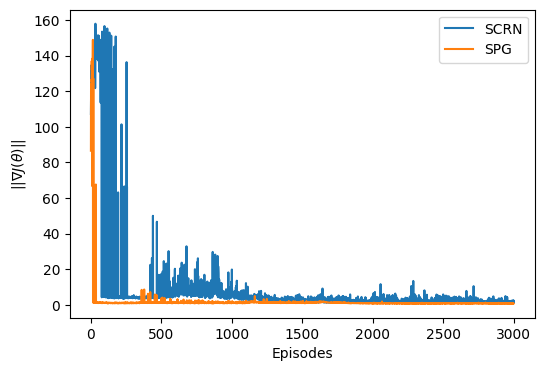

In [5]:
plt.rcParams.update(plt.rcParamsDefault)
plt.figure()
plt.figure(figsize=(6, 4))
if show_SCRN:
    plt.plot(average_stats["SCRN"]["gradients"], label="SCRN")
if show_SPG:
    plt.plot(average_stats["SPG"]["gradients"], label="SPG")
plt.ylabel(r"$\vert \vert \nabla J(\theta) \vert \vert$")
plt.xlabel("Episodes")
plt.legend(loc="best")
plt.show()

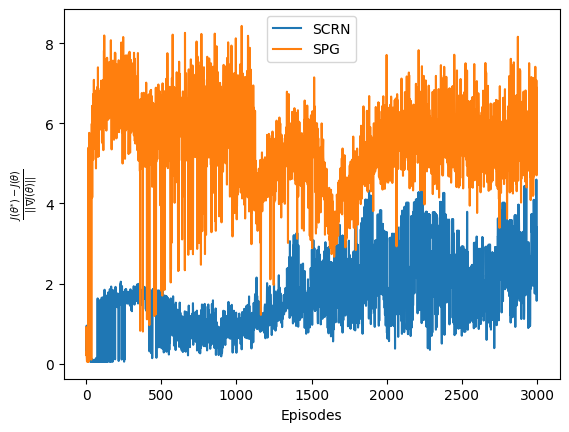

In [6]:
plt.figure()
if show_SCRN:
    plt.plot((average_stats["SCRN"]["optimum"]-average_stats["SCRN"]["objectives"])/average_stats["SCRN"]["gradients"], label="SCRN")
if show_SPG:
    plt.plot((average_stats["SPG"]["optimum"]-average_stats["SPG"]["objectives"])/average_stats["SPG"]["gradients"], label="SPG")
plt.legend(loc="best")
plt.xlabel("Episodes")
plt.ylabel(r"$\frac{J(\theta^{*}) - J(\theta)}{\vert \vert \nabla J(\theta) \vert \vert}$")
plt.show()

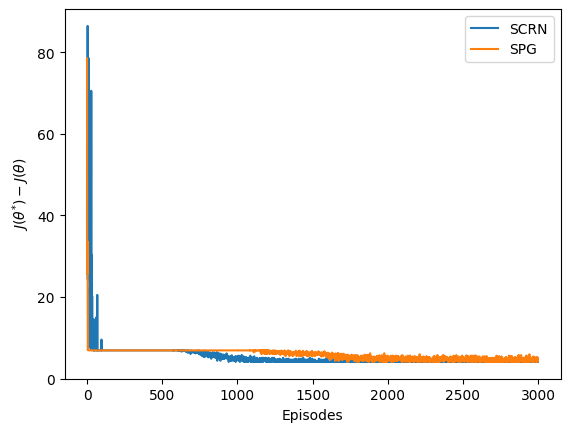

In [7]:
plt.figure()
if show_SCRN:
    plt.plot(average_stats["SCRN"]["optimum"] - average_stats["SCRN"]["objectives"], label="SCRN")
if show_SPG:
    plt.plot(average_stats["SPG"]["optimum"] - average_stats["SPG"]["objectives"], label="SPG")
plt.legend(loc="best")
plt.xlabel("Episodes")
plt.ylabel(r"$J(\theta^{*}) - J(\theta)$")
plt.show()

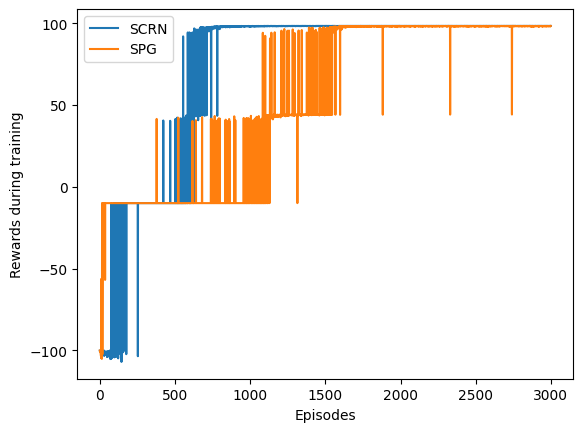

In [8]:
plt.figure()
if show_SCRN:
    plt.plot(average_stats["SCRN"]["rewards"], label="SCRN")
if show_SPG:
    plt.plot(average_stats["SPG"]["rewards"], label="SPG")
plt.legend(loc="best")
plt.xlabel("Episodes")
plt.ylabel("Rewards during training")
plt.show()

In [15]:
def compare_probabilities_learned(average_stats, state, save_link):
    """
    Compare probabilities learned during training
    """

    fig, ax = plt.subplots(1, 2, tight_layout=True, figsize=(12, 5))
    fig.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.12)
    
    fig.suptitle(f"Probabilities for state {state}")
    
    length = average_stats["SPG"]["history_probs"].shape[0]
    
    ax[0].plot([average_stats["SPG"]["history_probs"][j][state, 0] for j in range(length)], label="SPG - P(up)")
    ax[0].plot([average_stats["SPG"]["history_probs"][j][state, 1] for j in range(length)], label="SPG - P(down)")

    ax[1].plot([average_stats["SCRN"]["history_probs"][j][state, 0] for j in range(length)], label="SCRN - P(up)")
    ax[1].plot([average_stats["SCRN"]["history_probs"][j][state, 1] for j in range(length)], label="SCRN - P(down)")

    ax[0].plot([average_stats["SPG"]["history_probs"][j][state, 2] for j in range(length)], label="SPG - P(left)")
    ax[0].plot([average_stats["SPG"]["history_probs"][j][state, 3] for j in range(length)], label="SPG - P(right)")

    ax[1].plot([average_stats["SCRN"]["history_probs"][j][state, 2] for j in range(length)], label="SCRN - P(left)")
    ax[1].plot([average_stats["SCRN"]["history_probs"][j][state, 3] for j in range(length)], label="SCRN - P(right)")

    ax[0].legend(loc="best")
    ax[1].legend(loc="best")

    ax[0].set_ylabel(r"$\pi_{\theta} (\cdot \vert s)$", fontsize=20)
    ax[0].set_xlabel("Episode", fontsize=20)

    ax[1].set_ylabel(r"$\pi_{\theta} (\cdot \vert s)$", fontsize=20)
    ax[1].set_xlabel("Episode", fontsize=20)

    ax[0].set_yticks(np.linspace(0, 1, 6), fontsize=15)
    ax[0].set_xticks(np.linspace(0, length, 6), fontsize=15)
    ax[1].set_yticks(np.linspace(0, 1, 6), fontsize=15)
    ax[1].set_xticks(np.linspace(0, length, 6), fontsize=15)
    
    plt.savefig(save_link)
    plt.show()
    
    return fig, ax

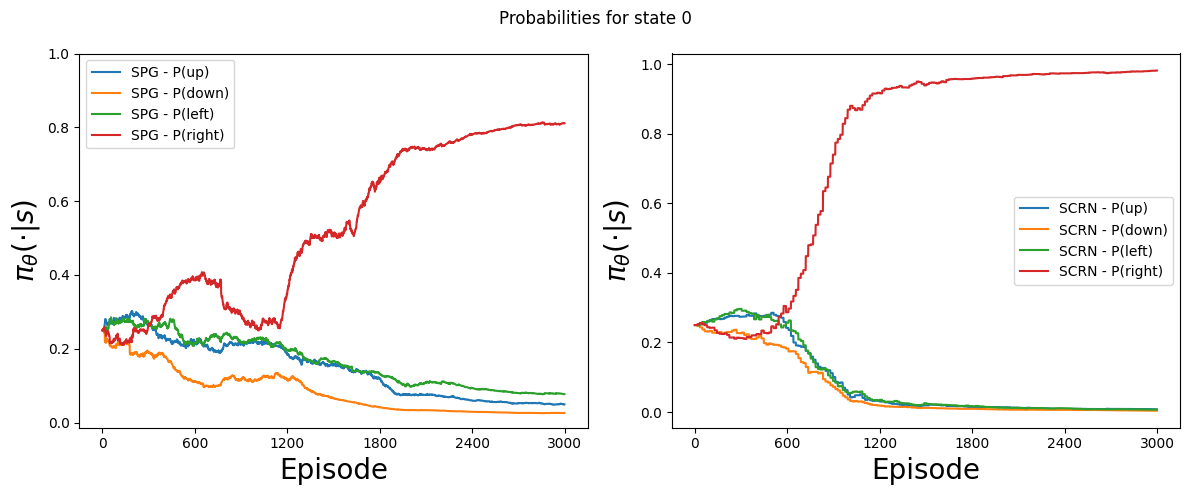

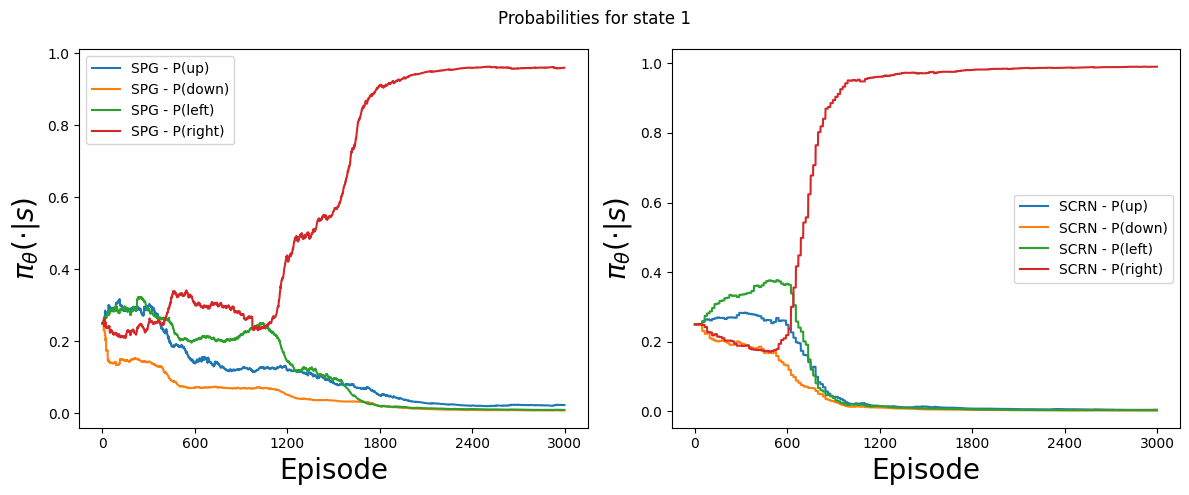

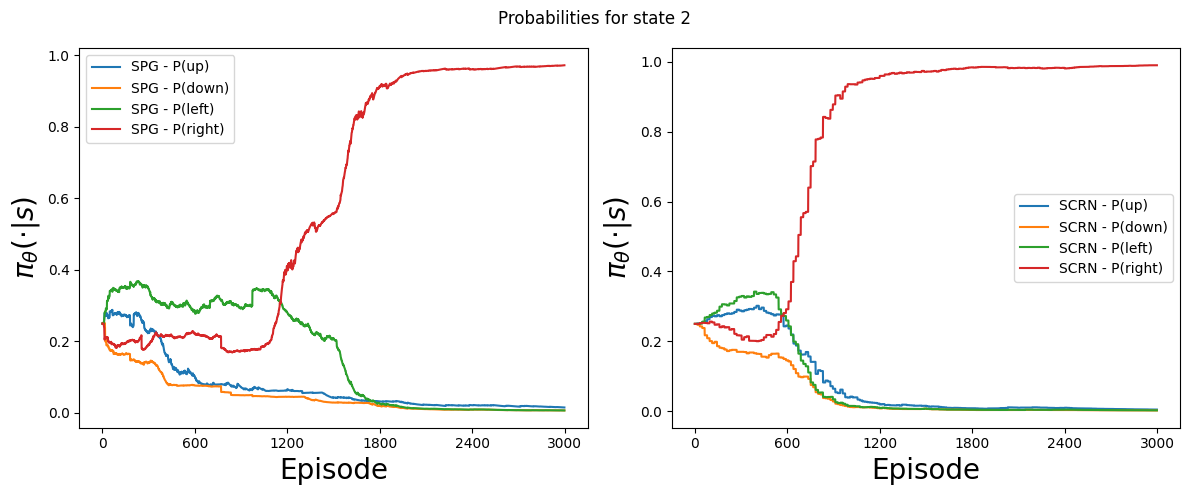

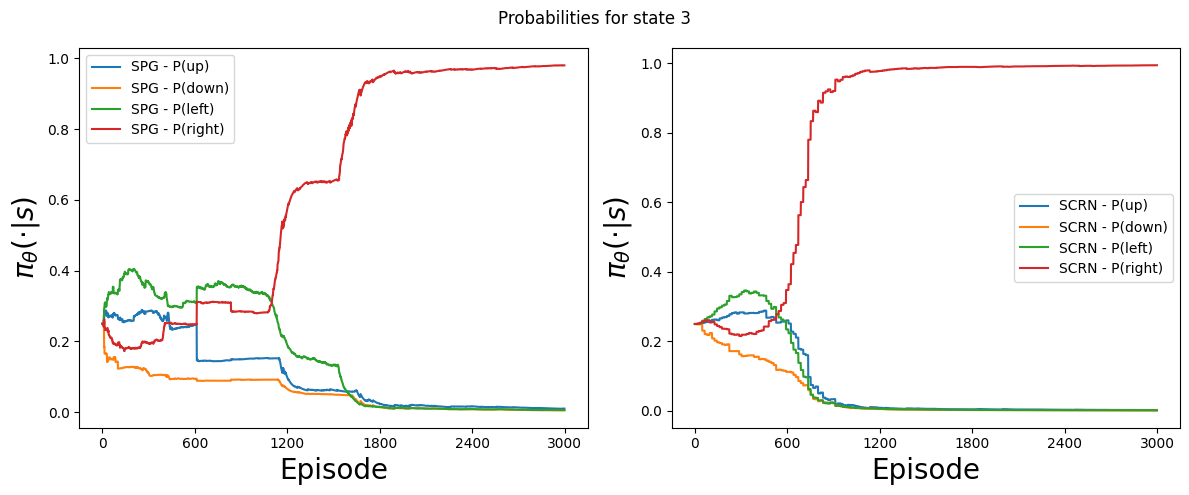

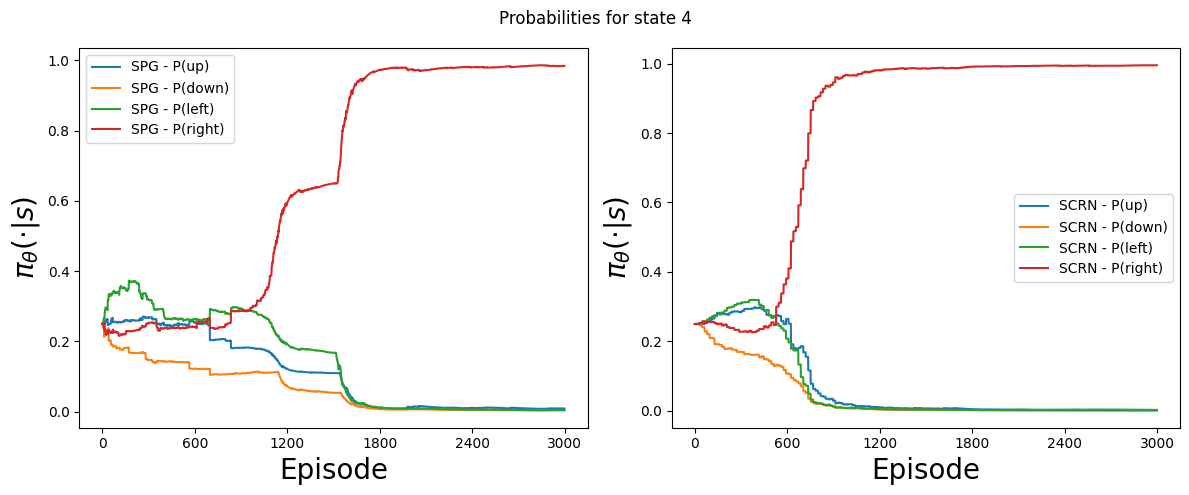

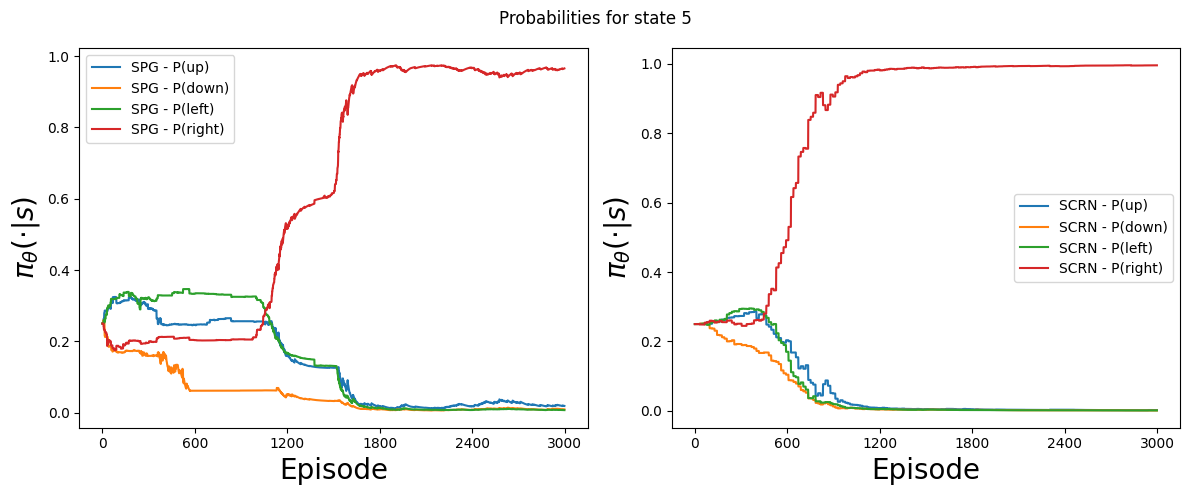

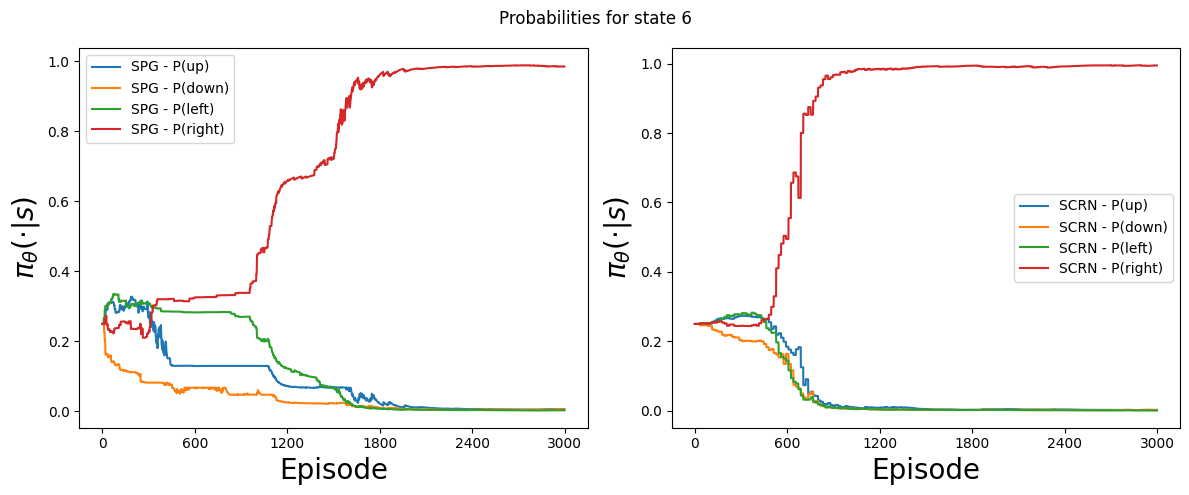

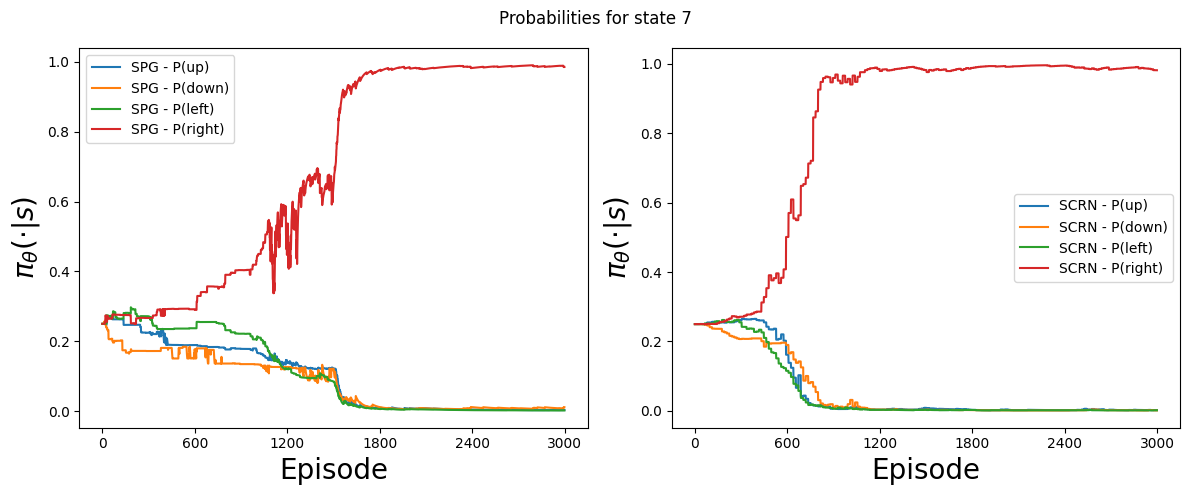

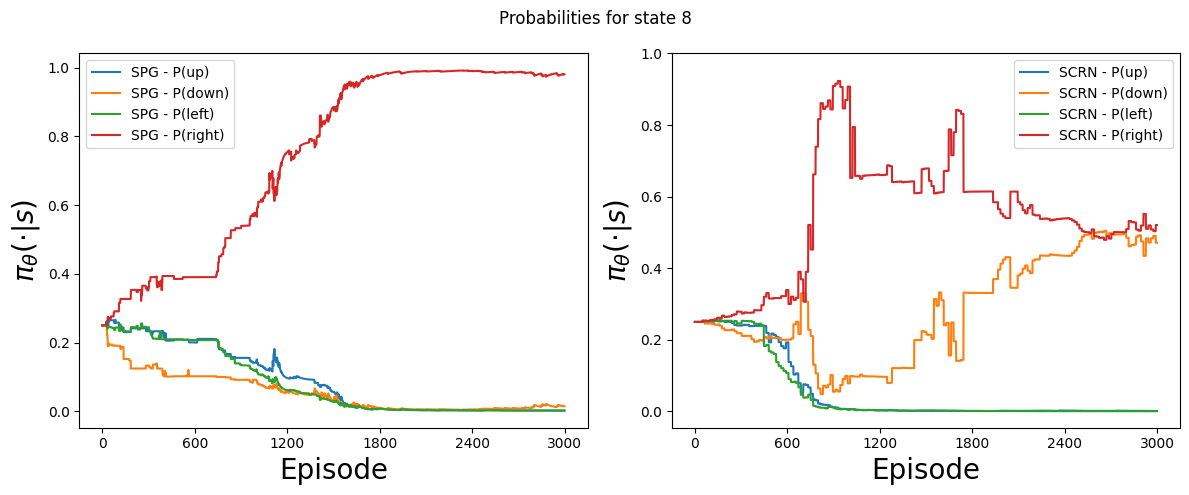

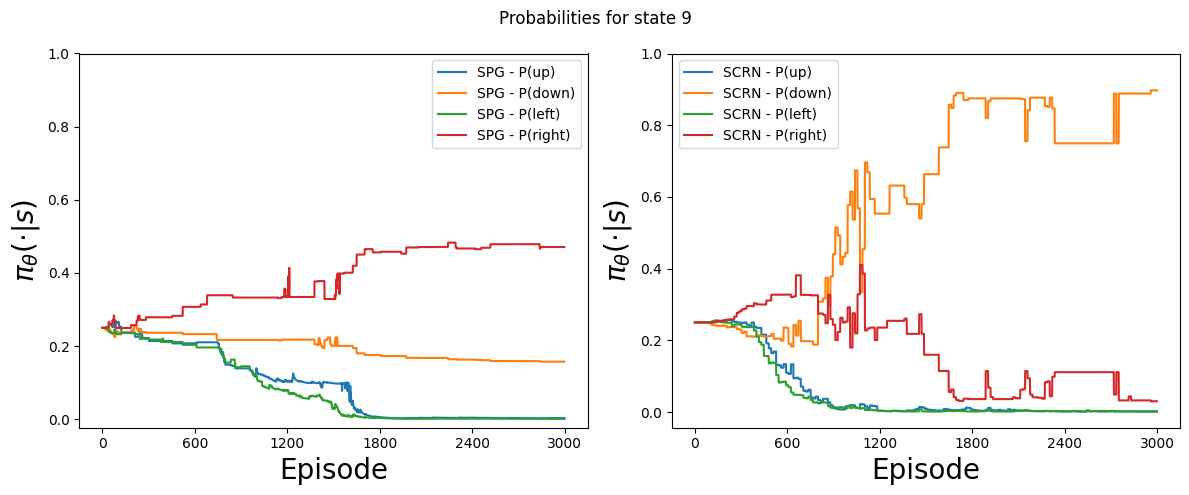

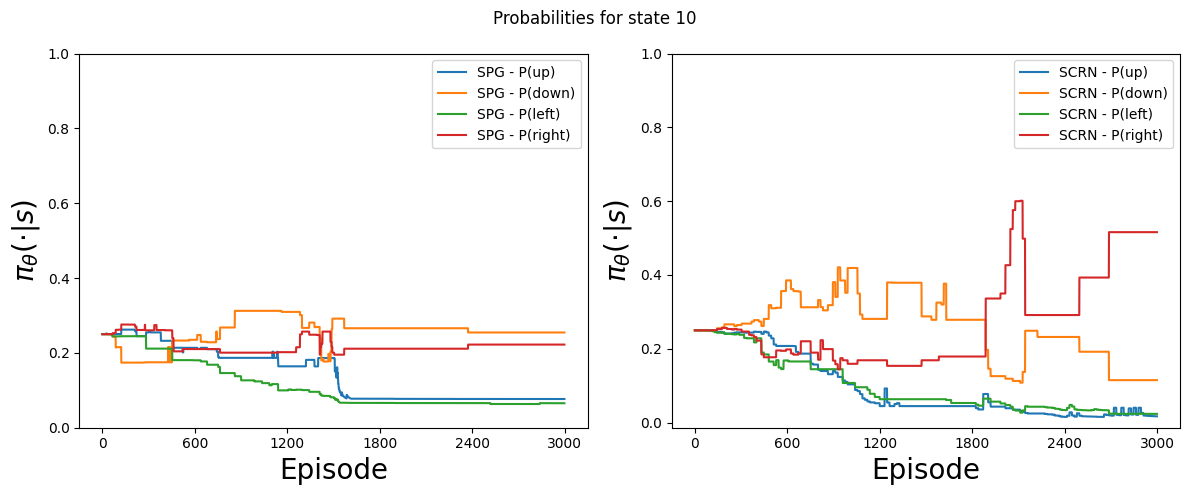

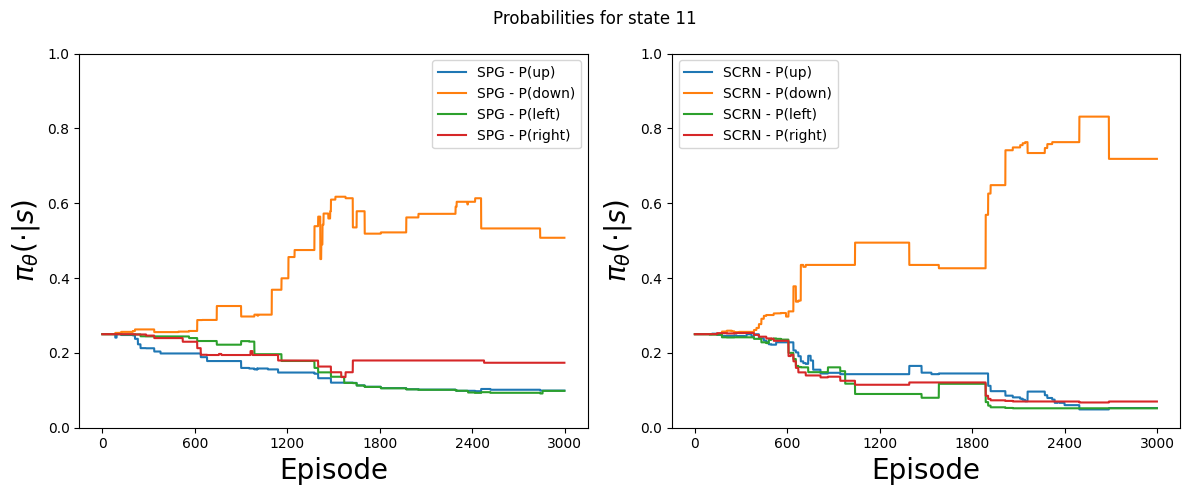

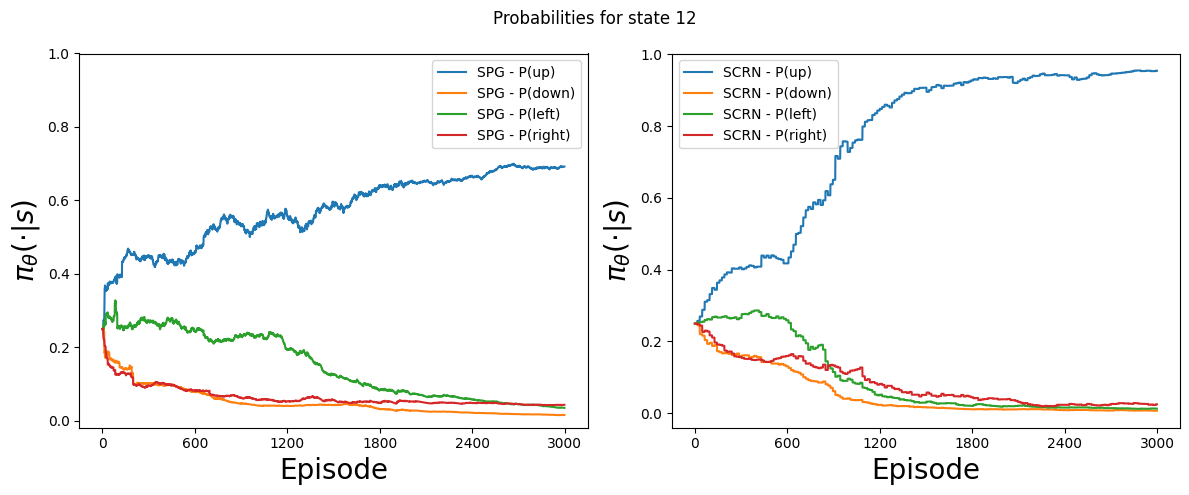

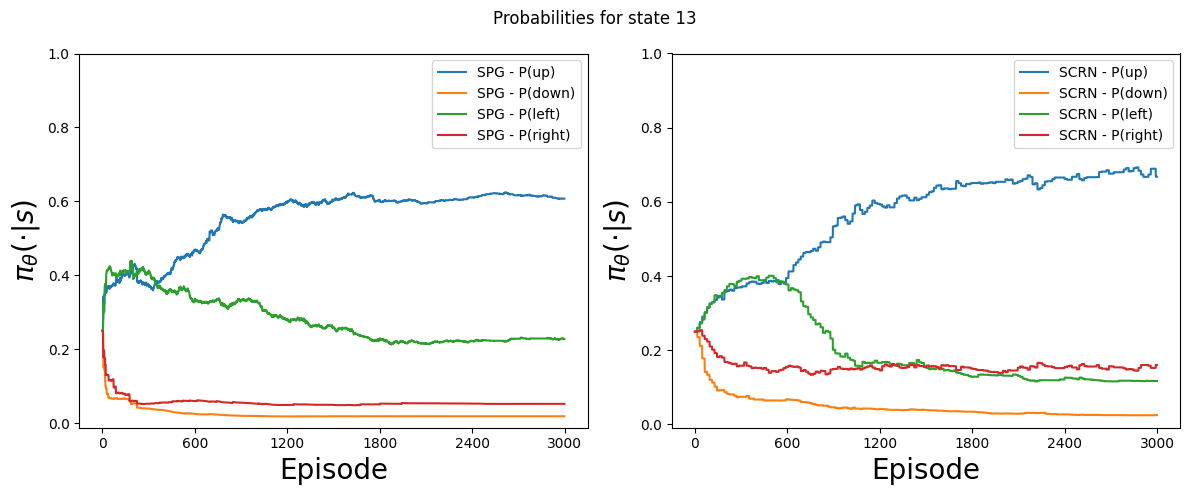

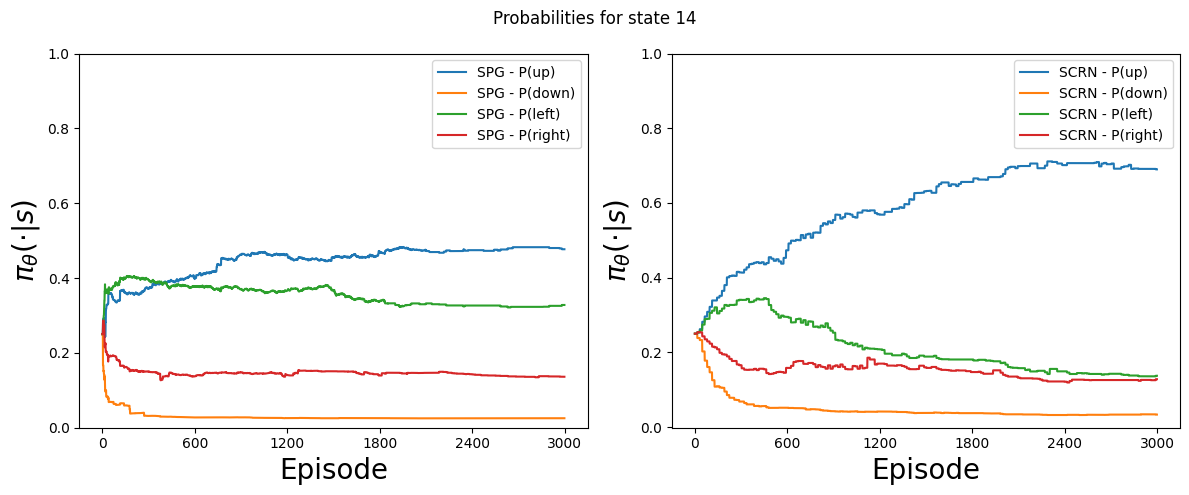

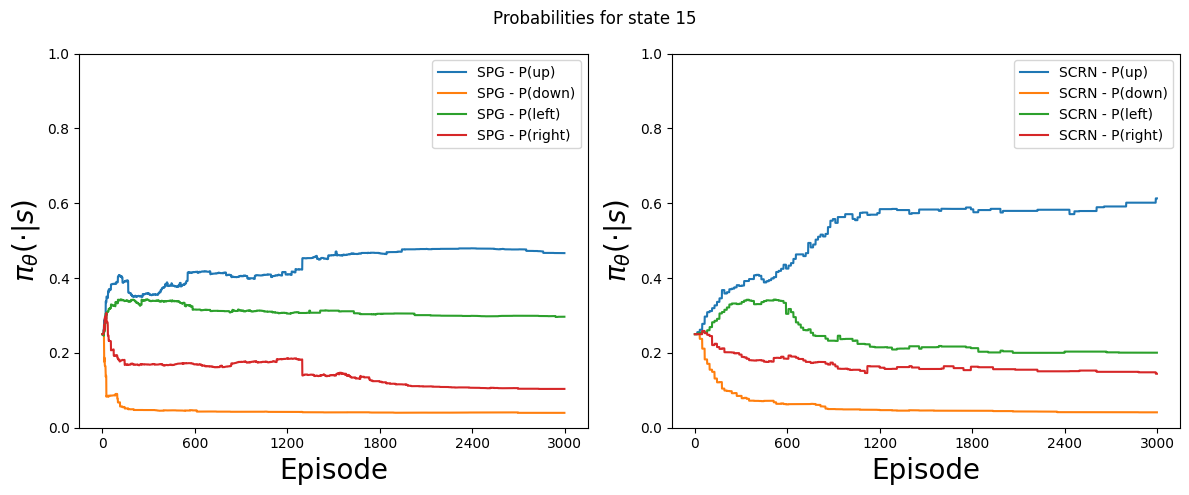

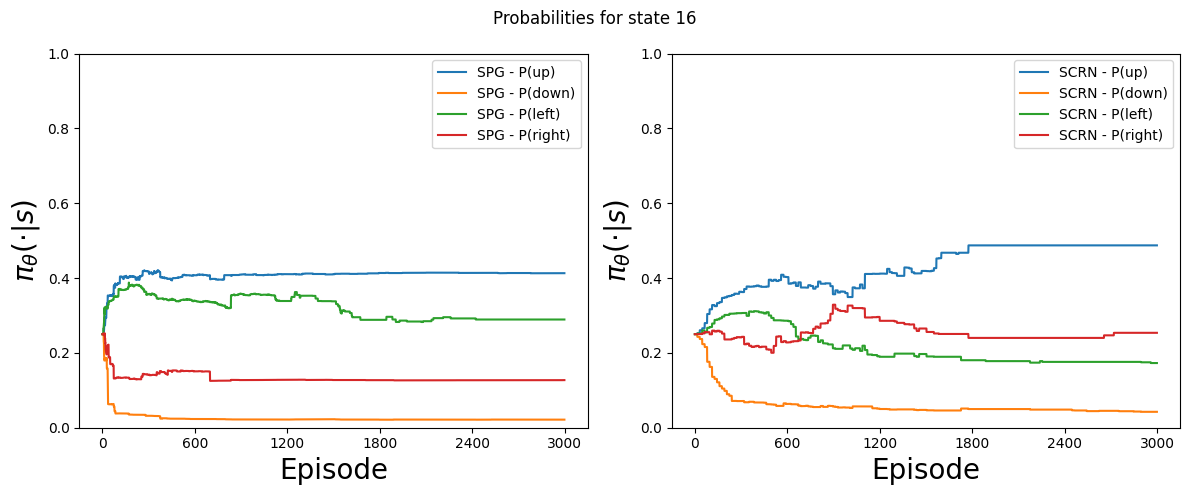

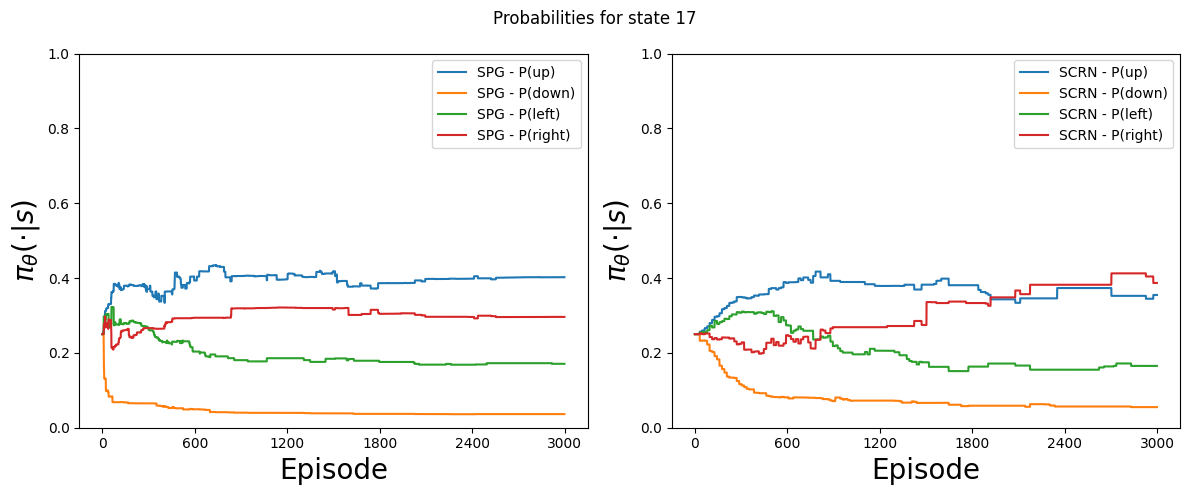

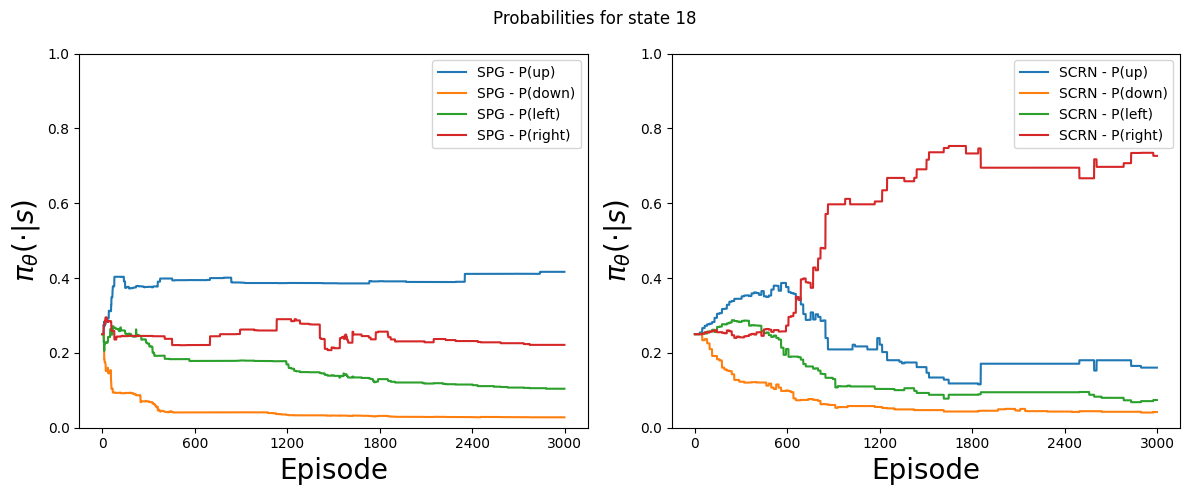

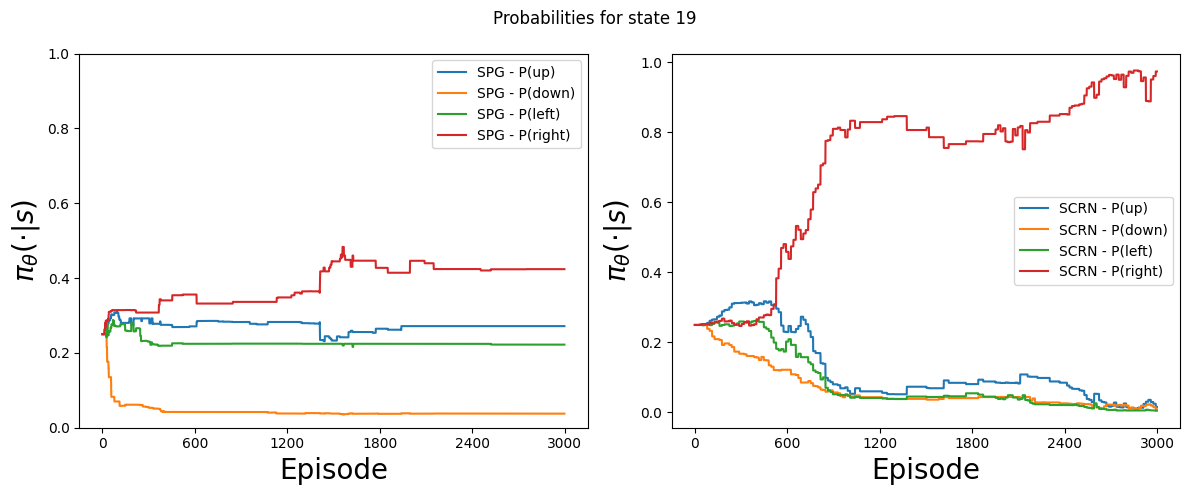

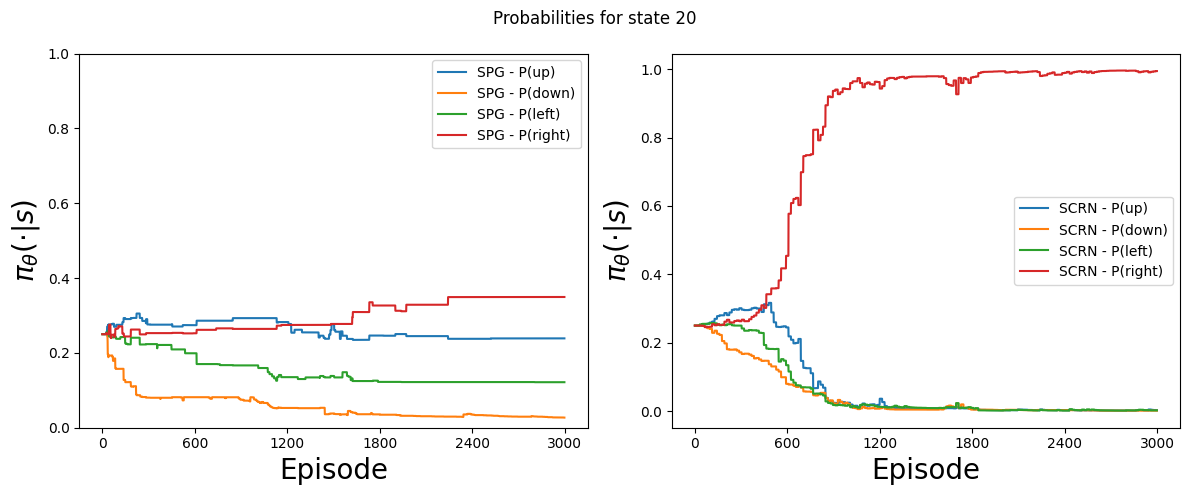

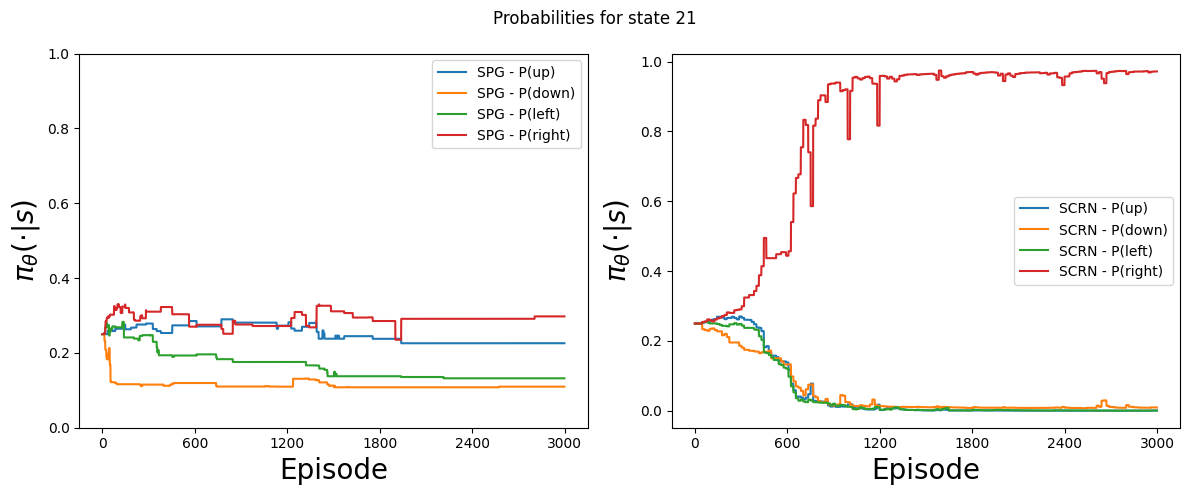

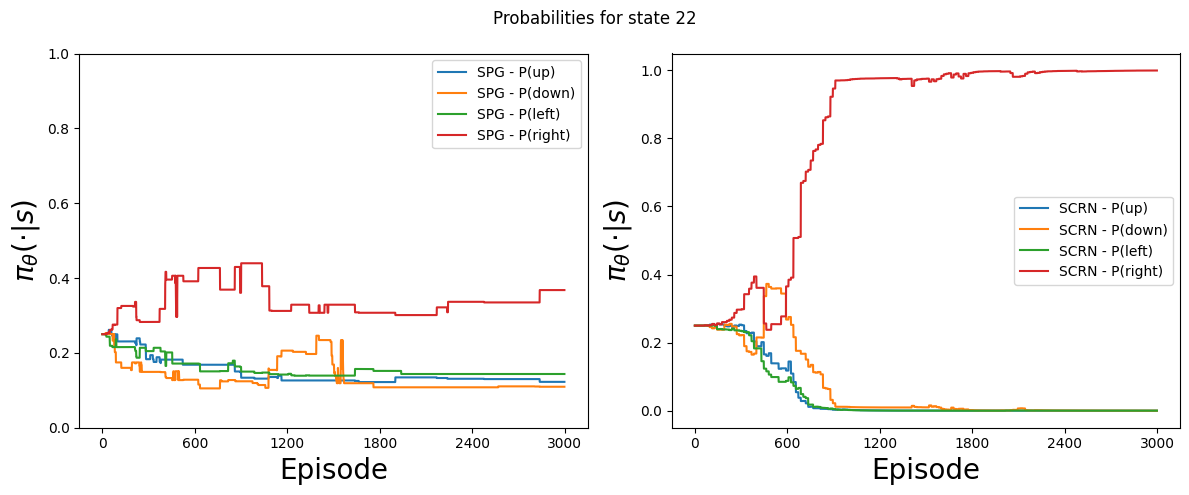

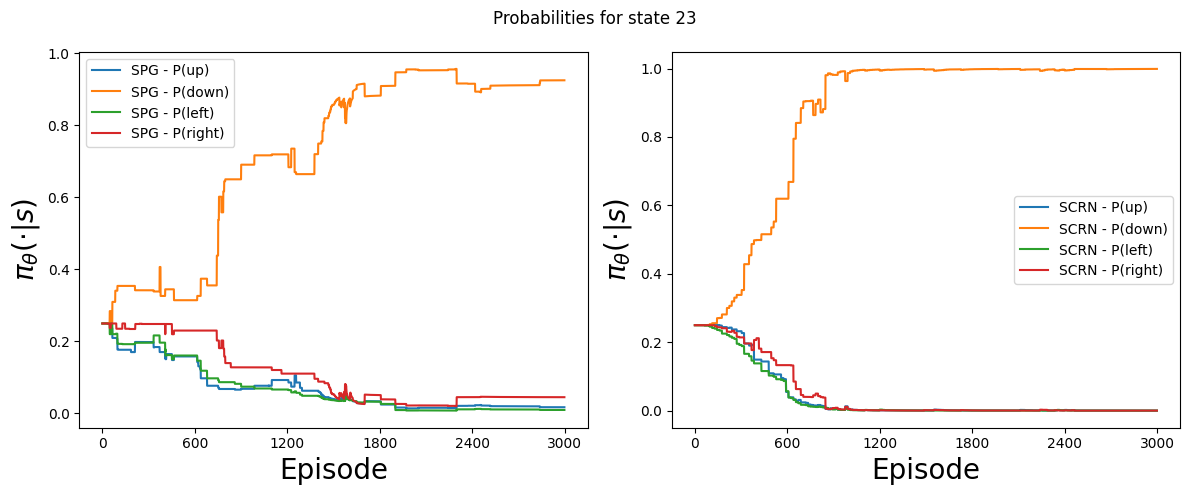

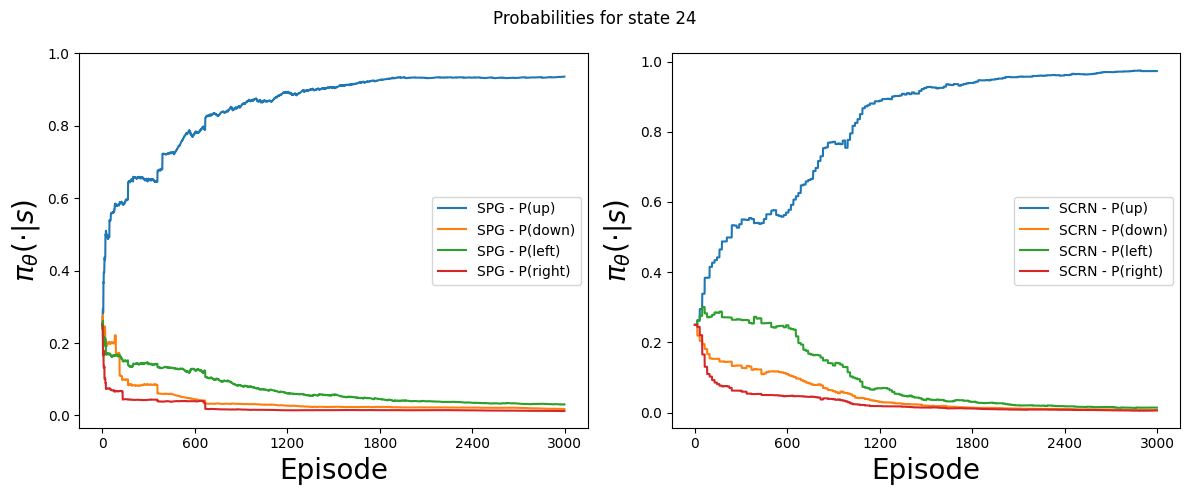

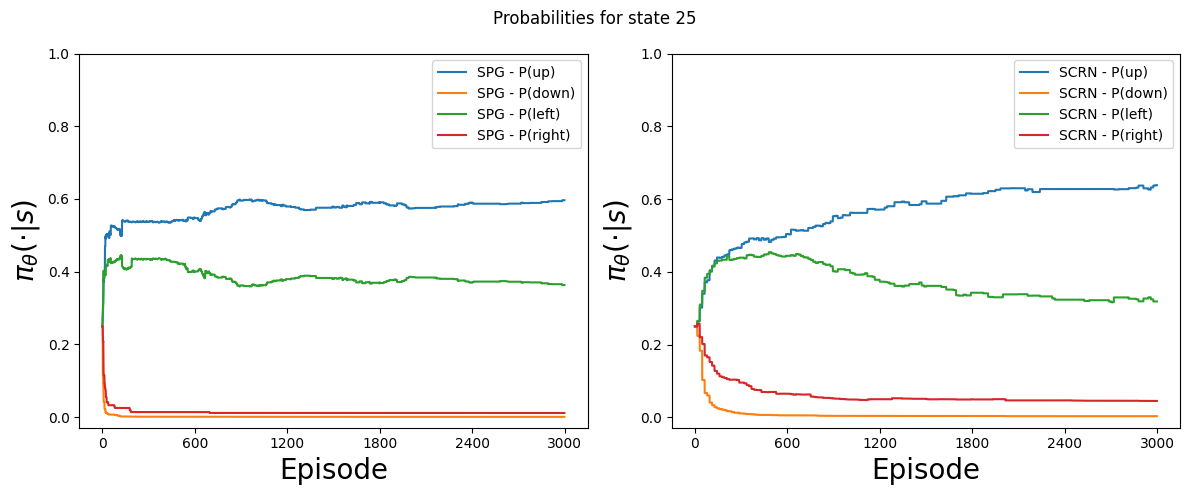

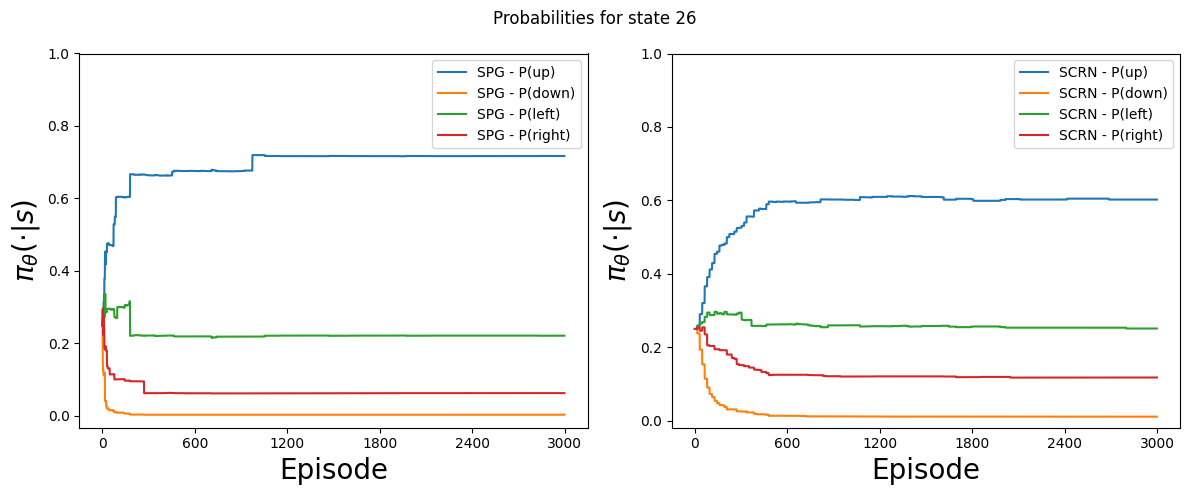

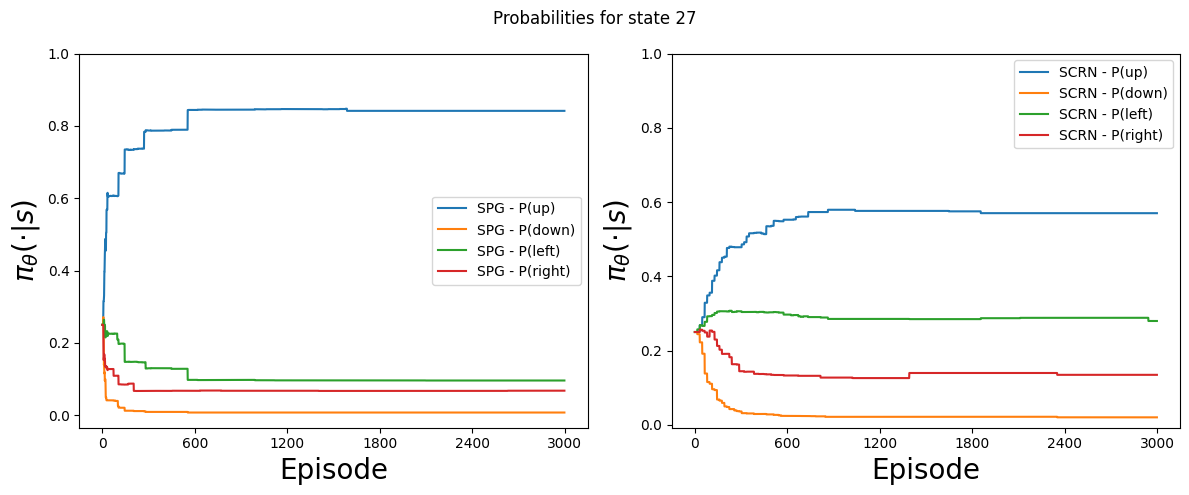

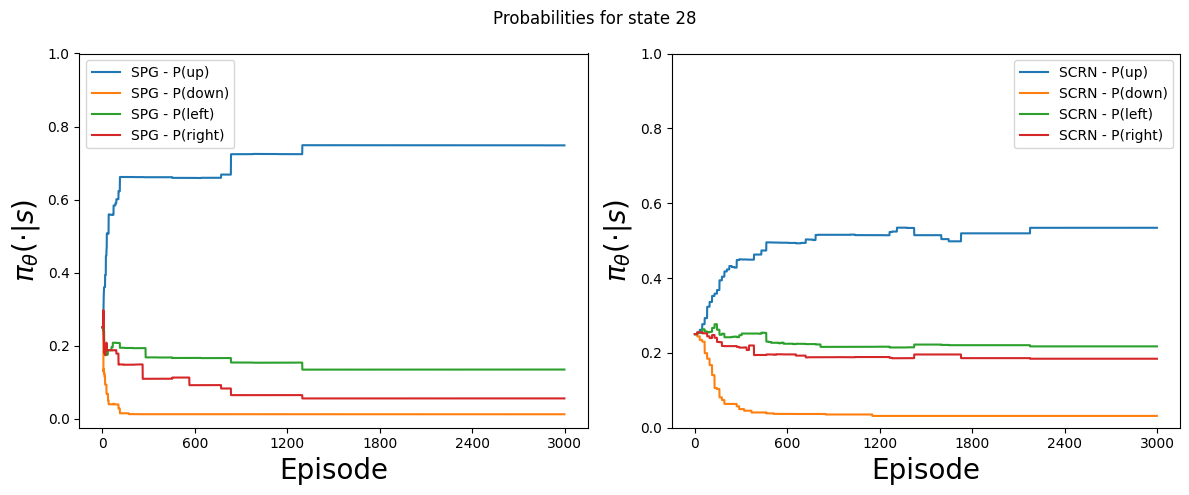

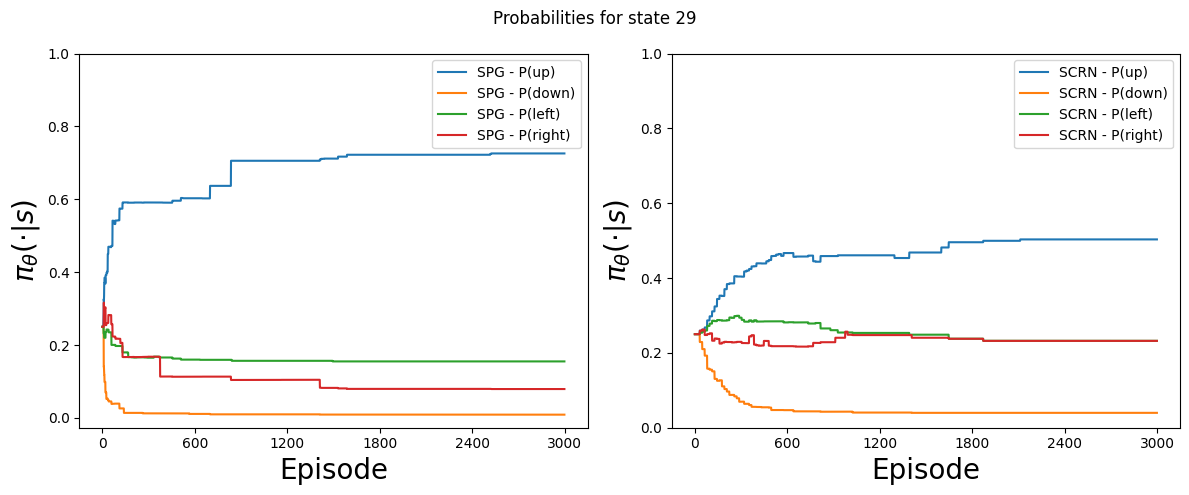

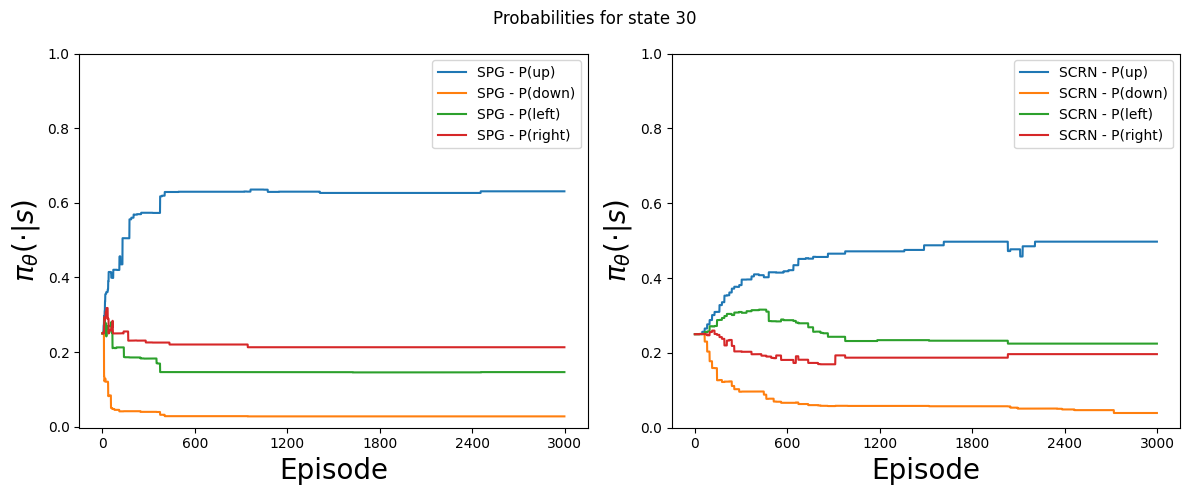

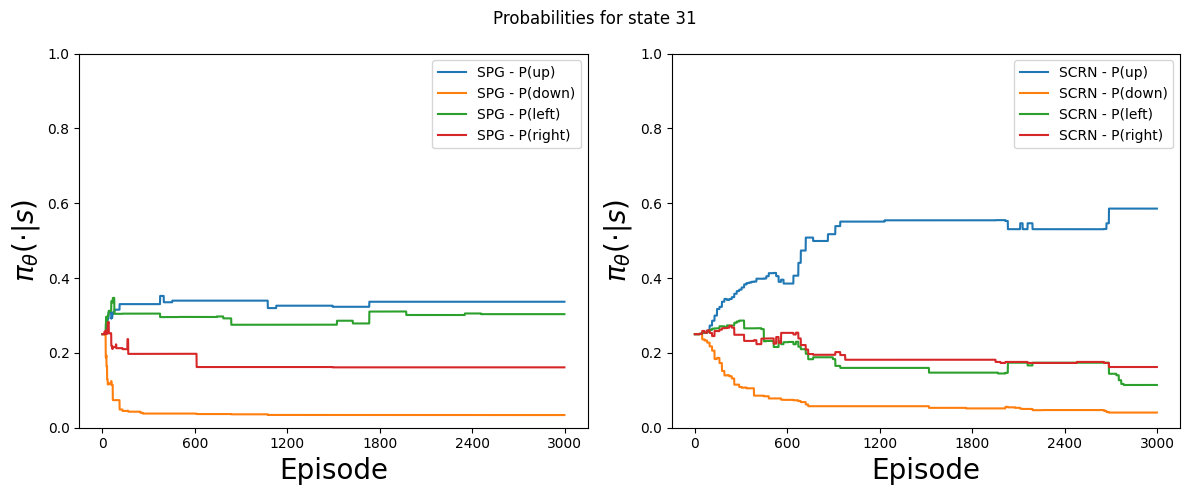

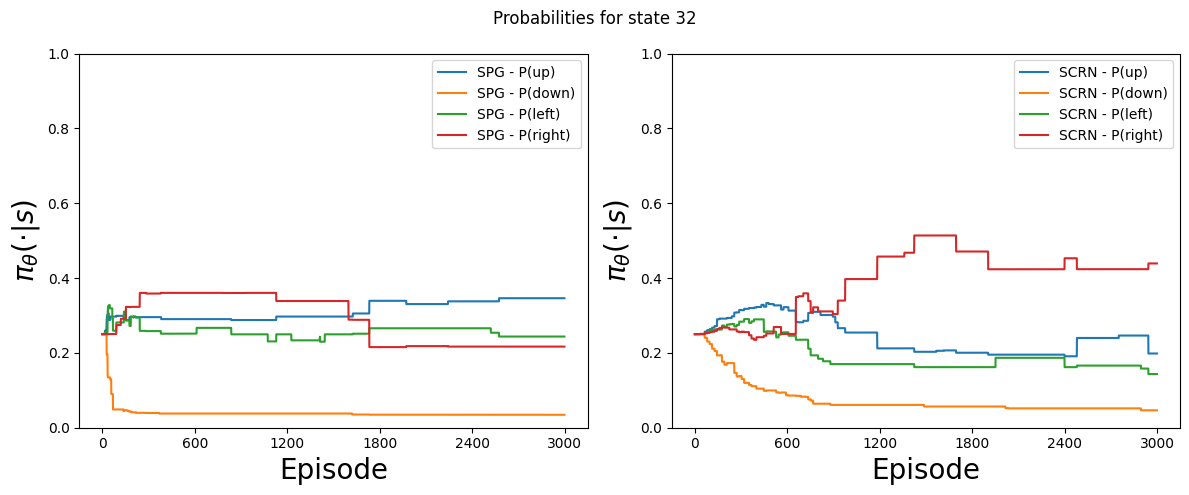

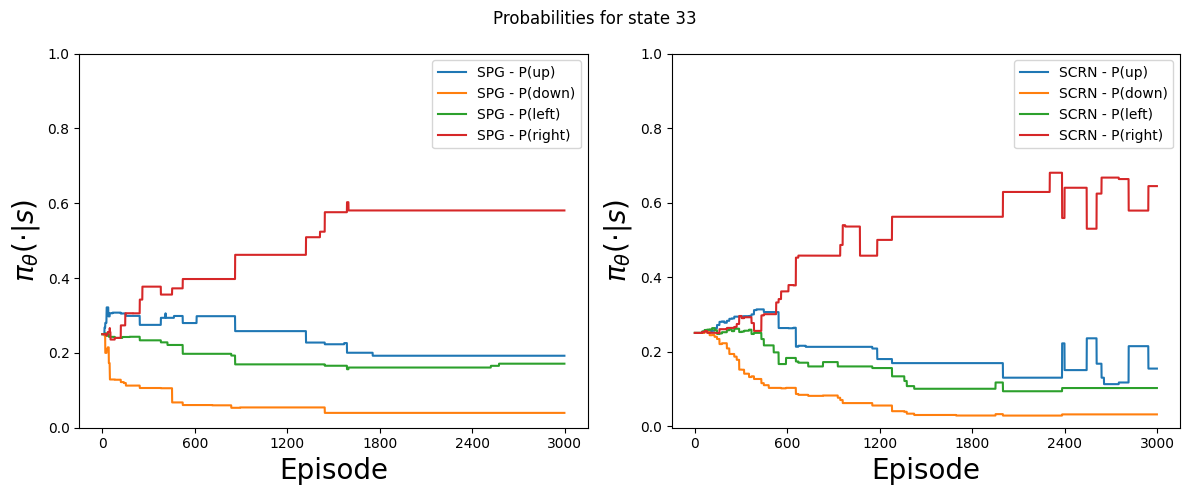

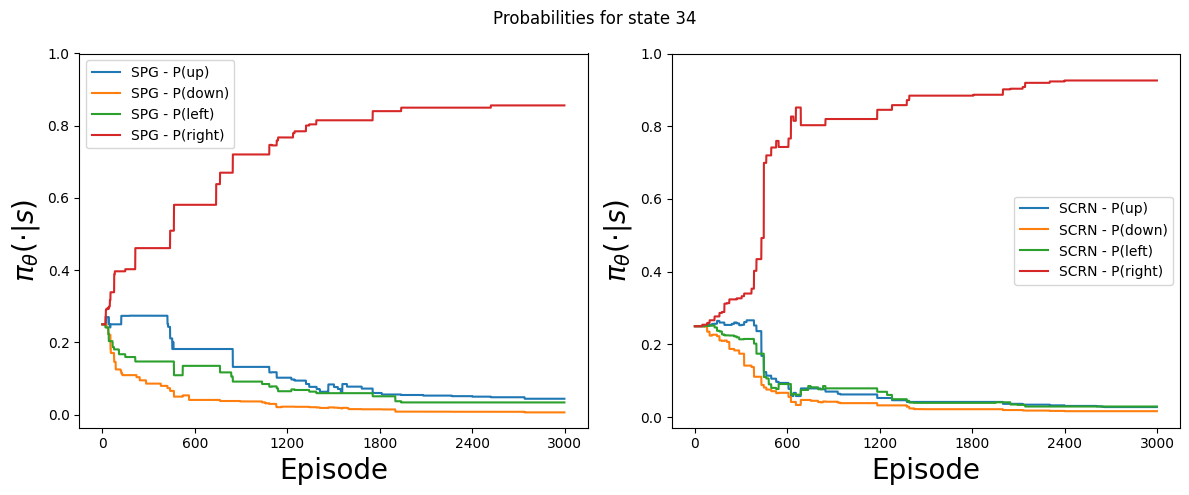

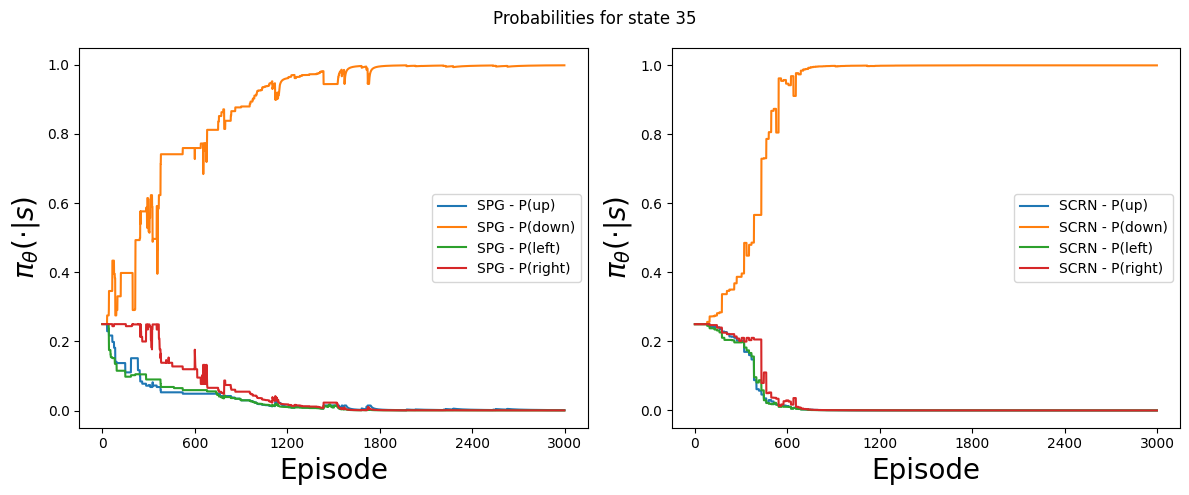

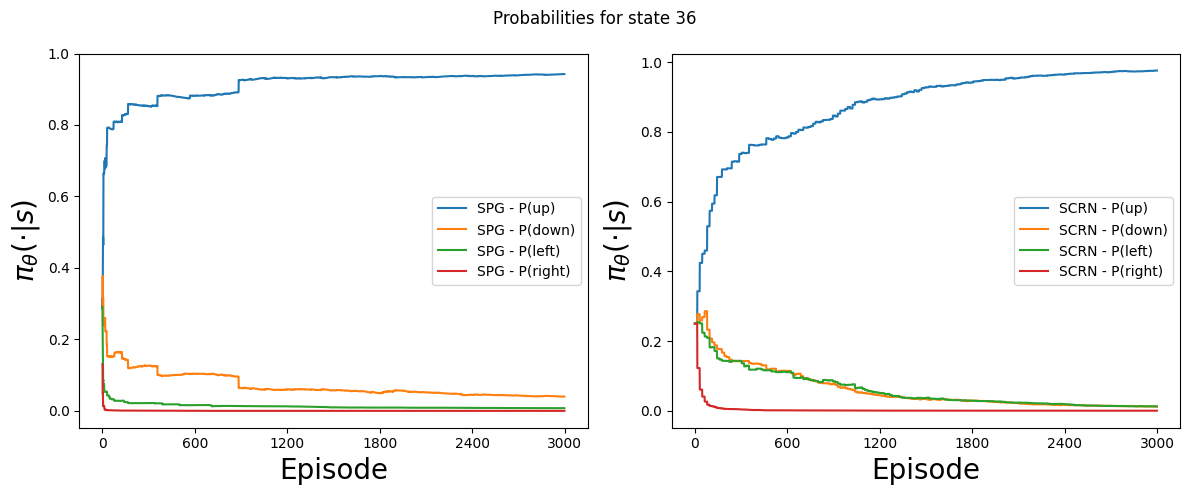

In [17]:
for j in range(37):
    compare_probabilities_learned(average_stats, j, f"figures/comparison/probabilities_{j}.png")

In [11]:
env = Cliff()
stats = discrete_SCRN(env, num_episodes=3000)

1 :  1.0
2 :  7.0
3 :  7.0
4 :  6.0
5 :  4.0
6 :  7.0
7 :  1.0
8 :  19.0
9 :  9.0
10 :  83.0
11 :  11.0
12 :  28.0
13 :  3.0
14 :  17.0
15 :  37.0
16 :  5.0
17 :  1.0
18 :  32.0
19 :  16.0
20 :  17.0
21 :  5.0
22 :  5.0
23 :  29.0
24 :  3.0
25 :  7.0
26 :  23.0
27 :  5.0
28 :  1.0
29 :  21.0
30 :  15.0


C:\Users\Federico Betti\Documents\GitHub\Global-Convergence-in-RL\RL_cliff\learning_algorithm.py:312: ComplexWarning: Casting complex values to real discards the imaginary part
  Hessians[episode] = np.linalg.eig(Hessian_traj)[0]


31 :  47.0
32 :  12.0
33 :  20.0
34 :  58.0
35 :  1.0
36 :  55.0
37 :  18.0
38 :  30.0
39 :  23.0
40 :  42.0
41 :  17.0
42 :  68.0
43 :  11.0
44 :  78.0
45 :  1.0
46 :  47.0
47 :  36.0
48 :  79.0
49 :  96.0
50 :  2.0
51 :  100.0
52 :  1.0
===== Goal reached in 41 steps =====
53 :  41.0
54 :  82.0
55 :  89.0
56 :  100.0
57 :  35.0
58 :  61.0
59 :  100.0
60 :  85.0
61 :  31.0
62 :  2.0
63 :  76.0
64 :  79.0
65 :  100.0
66 :  100.0
67 :  100.0
68 :  35.0
69 :  89.0
70 :  26.0
===== Goal reached in 58 steps =====
71 :  58.0
72 :  80.0
73 :  23.0
74 :  72.0
75 :  3.0
76 :  65.0
77 :  100.0
78 :  100.0
79 :  100.0
80 :  23.0
81 :  100.0
===== Goal reached in 58 steps =====
82 :  58.0
83 :  93.0
84 :  100.0
85 :  100.0
86 :  90.0
87 :  53.0
88 :  50.0
89 :  96.0
90 :  42.0
91 :  1.0
92 :  100.0
93 :  65.0
94 :  39.0
95 :  32.0
96 :  100.0
97 :  100.0
98 :  100.0
99 :  33.0
100 :  15.0
101 :  40.0
102 :  91.0
103 :  100.0
104 :  100.0
105 :  54.0
106 :  100.0
107 :  100.0
108 :  100.0
109 :  1

579 :  100.0
===== Goal reached in 70 steps =====
580 :  70.0
===== Goal reached in 99 steps =====
581 :  99.0
582 :  100.0
===== Goal reached in 34 steps =====
583 :  34.0
584 :  100.0
===== Goal reached in 67 steps =====
585 :  67.0
586 :  100.0
===== Goal reached in 52 steps =====
587 :  52.0
===== Goal reached in 88 steps =====
588 :  88.0
589 :  100.0
===== Goal reached in 68 steps =====
590 :  68.0
591 :  100.0
592 :  100.0
593 :  100.0
===== Goal reached in 41 steps =====
594 :  41.0
===== Goal reached in 58 steps =====
595 :  58.0
===== Goal reached in 45 steps =====
596 :  45.0
===== Goal reached in 78 steps =====
597 :  78.0
===== Goal reached in 43 steps =====
598 :  43.0
===== Goal reached in 64 steps =====
599 :  64.0
===== Goal reached in 30 steps =====
600 :  30.0
601 :  100.0
602 :  100.0
===== Goal reached in 41 steps =====
603 :  41.0
===== Goal reached in 68 steps =====
604 :  68.0
===== Goal reached in 34 steps =====
605 :  34.0
===== Goal reached in 48 steps =====


775 :  20.0
===== Goal reached in 20 steps =====
776 :  20.0
===== Goal reached in 17 steps =====
777 :  17.0
===== Goal reached in 17 steps =====
778 :  17.0
===== Goal reached in 17 steps =====
779 :  17.0
===== Goal reached in 18 steps =====
780 :  18.0
===== Goal reached in 23 steps =====
781 :  23.0
===== Goal reached in 24 steps =====
782 :  24.0
===== Goal reached in 19 steps =====
783 :  19.0
===== Goal reached in 20 steps =====
784 :  20.0
===== Goal reached in 17 steps =====
785 :  17.0
===== Goal reached in 25 steps =====
786 :  25.0
===== Goal reached in 18 steps =====
787 :  18.0
===== Goal reached in 20 steps =====
788 :  20.0
===== Goal reached in 26 steps =====
789 :  26.0
===== Goal reached in 23 steps =====
790 :  23.0
===== Goal reached in 21 steps =====
791 :  21.0
===== Goal reached in 22 steps =====
792 :  22.0
===== Goal reached in 20 steps =====
793 :  20.0
===== Goal reached in 19 steps =====
794 :  19.0
===== Goal reached in 20 steps =====
795 :  20.0
===== Go

===== Goal reached in 17 steps =====
964 :  17.0
===== Goal reached in 19 steps =====
965 :  19.0
===== Goal reached in 18 steps =====
966 :  18.0
===== Goal reached in 17 steps =====
967 :  17.0
===== Goal reached in 17 steps =====
968 :  17.0
===== Goal reached in 18 steps =====
969 :  18.0
===== Goal reached in 21 steps =====
970 :  21.0
===== Goal reached in 17 steps =====
971 :  17.0
===== Goal reached in 17 steps =====
972 :  17.0
===== Goal reached in 18 steps =====
973 :  18.0
===== Goal reached in 29 steps =====
974 :  29.0
===== Goal reached in 18 steps =====
975 :  18.0
===== Goal reached in 18 steps =====
976 :  18.0
===== Goal reached in 18 steps =====
977 :  18.0
===== Goal reached in 19 steps =====
978 :  19.0
===== Goal reached in 20 steps =====
979 :  20.0
===== Goal reached in 24 steps =====
980 :  24.0
===== Goal reached in 20 steps =====
981 :  20.0
===== Goal reached in 17 steps =====
982 :  17.0
===== Goal reached in 18 steps =====
983 :  18.0
===== Goal reached i

1150 :  17.0
===== Goal reached in 17 steps =====
1151 :  17.0
===== Goal reached in 17 steps =====
1152 :  17.0
===== Goal reached in 17 steps =====
1153 :  17.0
===== Goal reached in 17 steps =====
1154 :  17.0
===== Goal reached in 17 steps =====
1155 :  17.0
===== Goal reached in 17 steps =====
1156 :  17.0
===== Goal reached in 17 steps =====
1157 :  17.0
===== Goal reached in 17 steps =====
1158 :  17.0
===== Goal reached in 17 steps =====
1159 :  17.0
===== Goal reached in 17 steps =====
1160 :  17.0
===== Goal reached in 17 steps =====
1161 :  17.0
===== Goal reached in 18 steps =====
1162 :  18.0
===== Goal reached in 18 steps =====
1163 :  18.0
===== Goal reached in 17 steps =====
1164 :  17.0
===== Goal reached in 19 steps =====
1165 :  19.0
===== Goal reached in 17 steps =====
1166 :  17.0
===== Goal reached in 18 steps =====
1167 :  18.0
===== Goal reached in 17 steps =====
1168 :  17.0
===== Goal reached in 17 steps =====
1169 :  17.0
===== Goal reached in 19 steps =====


1318 :  17.0
===== Goal reached in 17 steps =====
1319 :  17.0
===== Goal reached in 19 steps =====
1320 :  19.0
===== Goal reached in 21 steps =====
1321 :  21.0
===== Goal reached in 19 steps =====
1322 :  19.0
===== Goal reached in 17 steps =====
1323 :  17.0
===== Goal reached in 21 steps =====
1324 :  21.0
===== Goal reached in 17 steps =====
1325 :  17.0
===== Goal reached in 19 steps =====
1326 :  19.0
===== Goal reached in 18 steps =====
1327 :  18.0
===== Goal reached in 18 steps =====
1328 :  18.0
===== Goal reached in 17 steps =====
1329 :  17.0
===== Goal reached in 17 steps =====
1330 :  17.0
===== Goal reached in 17 steps =====
1331 :  17.0
===== Goal reached in 17 steps =====
1332 :  17.0
===== Goal reached in 17 steps =====
1333 :  17.0
===== Goal reached in 18 steps =====
1334 :  18.0
===== Goal reached in 17 steps =====
1335 :  17.0
===== Goal reached in 17 steps =====
1336 :  17.0
===== Goal reached in 18 steps =====
1337 :  18.0
===== Goal reached in 19 steps =====


===== Goal reached in 17 steps =====
1484 :  17.0
===== Goal reached in 17 steps =====
1485 :  17.0
===== Goal reached in 18 steps =====
1486 :  18.0
===== Goal reached in 17 steps =====
1487 :  17.0
===== Goal reached in 19 steps =====
1488 :  19.0
===== Goal reached in 17 steps =====
1489 :  17.0
===== Goal reached in 17 steps =====
1490 :  17.0
===== Goal reached in 17 steps =====
1491 :  17.0
===== Goal reached in 17 steps =====
1492 :  17.0
===== Goal reached in 18 steps =====
1493 :  18.0
===== Goal reached in 18 steps =====
1494 :  18.0
===== Goal reached in 17 steps =====
1495 :  17.0
===== Goal reached in 22 steps =====
1496 :  22.0
===== Goal reached in 17 steps =====
1497 :  17.0
===== Goal reached in 19 steps =====
1498 :  19.0
===== Goal reached in 17 steps =====
1499 :  17.0
===== Goal reached in 19 steps =====
1500 :  19.0
===== Goal reached in 20 steps =====
1501 :  20.0
===== Goal reached in 18 steps =====
1502 :  18.0
===== Goal reached in 17 steps =====
1503 :  17.0


1650 :  17.0
===== Goal reached in 17 steps =====
1651 :  17.0
===== Goal reached in 19 steps =====
1652 :  19.0
===== Goal reached in 17 steps =====
1653 :  17.0
===== Goal reached in 17 steps =====
1654 :  17.0
===== Goal reached in 18 steps =====
1655 :  18.0
===== Goal reached in 19 steps =====
1656 :  19.0
===== Goal reached in 17 steps =====
1657 :  17.0
===== Goal reached in 17 steps =====
1658 :  17.0
===== Goal reached in 17 steps =====
1659 :  17.0
===== Goal reached in 17 steps =====
1660 :  17.0
===== Goal reached in 18 steps =====
1661 :  18.0
===== Goal reached in 17 steps =====
1662 :  17.0
===== Goal reached in 17 steps =====
1663 :  17.0
===== Goal reached in 17 steps =====
1664 :  17.0
===== Goal reached in 17 steps =====
1665 :  17.0
===== Goal reached in 18 steps =====
1666 :  18.0
===== Goal reached in 17 steps =====
1667 :  17.0
===== Goal reached in 17 steps =====
1668 :  17.0
===== Goal reached in 19 steps =====
1669 :  19.0
===== Goal reached in 22 steps =====


1829 :  18.0
===== Goal reached in 17 steps =====
1830 :  17.0
===== Goal reached in 17 steps =====
1831 :  17.0
===== Goal reached in 17 steps =====
1832 :  17.0
===== Goal reached in 17 steps =====
1833 :  17.0
===== Goal reached in 17 steps =====
1834 :  17.0
===== Goal reached in 18 steps =====
1835 :  18.0
===== Goal reached in 17 steps =====
1836 :  17.0
===== Goal reached in 17 steps =====
1837 :  17.0
===== Goal reached in 17 steps =====
1838 :  17.0
===== Goal reached in 18 steps =====
1839 :  18.0
===== Goal reached in 18 steps =====
1840 :  18.0
===== Goal reached in 17 steps =====
1841 :  17.0
===== Goal reached in 17 steps =====
1842 :  17.0
===== Goal reached in 19 steps =====
1843 :  19.0
===== Goal reached in 19 steps =====
1844 :  19.0
===== Goal reached in 17 steps =====
1845 :  17.0
===== Goal reached in 18 steps =====
1846 :  18.0
===== Goal reached in 19 steps =====
1847 :  19.0
===== Goal reached in 17 steps =====
1848 :  17.0
===== Goal reached in 17 steps =====


2007 :  17.0
===== Goal reached in 17 steps =====
2008 :  17.0
===== Goal reached in 17 steps =====
2009 :  17.0
===== Goal reached in 17 steps =====
2010 :  17.0
===== Goal reached in 17 steps =====
2011 :  17.0
===== Goal reached in 17 steps =====
2012 :  17.0
===== Goal reached in 19 steps =====
2013 :  19.0
===== Goal reached in 17 steps =====
2014 :  17.0
===== Goal reached in 17 steps =====
2015 :  17.0
===== Goal reached in 17 steps =====
2016 :  17.0
===== Goal reached in 17 steps =====
2017 :  17.0
===== Goal reached in 17 steps =====
2018 :  17.0
===== Goal reached in 17 steps =====
2019 :  17.0
===== Goal reached in 17 steps =====
2020 :  17.0
===== Goal reached in 17 steps =====
2021 :  17.0
===== Goal reached in 17 steps =====
2022 :  17.0
===== Goal reached in 17 steps =====
2023 :  17.0
===== Goal reached in 17 steps =====
2024 :  17.0
===== Goal reached in 17 steps =====
2025 :  17.0
===== Goal reached in 17 steps =====
2026 :  17.0
===== Goal reached in 17 steps =====


2191 :  17.0
===== Goal reached in 17 steps =====
2192 :  17.0
===== Goal reached in 17 steps =====
2193 :  17.0
===== Goal reached in 17 steps =====
2194 :  17.0
===== Goal reached in 17 steps =====
2195 :  17.0
===== Goal reached in 18 steps =====
2196 :  18.0
===== Goal reached in 17 steps =====
2197 :  17.0
===== Goal reached in 17 steps =====
2198 :  17.0
===== Goal reached in 17 steps =====
2199 :  17.0
===== Goal reached in 17 steps =====
2200 :  17.0
===== Goal reached in 17 steps =====
2201 :  17.0
===== Goal reached in 17 steps =====
2202 :  17.0
===== Goal reached in 17 steps =====
2203 :  17.0
===== Goal reached in 17 steps =====
2204 :  17.0
===== Goal reached in 17 steps =====
2205 :  17.0
===== Goal reached in 17 steps =====
2206 :  17.0
===== Goal reached in 18 steps =====
2207 :  18.0
===== Goal reached in 17 steps =====
2208 :  17.0
===== Goal reached in 17 steps =====
2209 :  17.0
===== Goal reached in 17 steps =====
2210 :  17.0
===== Goal reached in 17 steps =====


2360 :  17.0
===== Goal reached in 17 steps =====
2361 :  17.0
===== Goal reached in 17 steps =====
2362 :  17.0
===== Goal reached in 17 steps =====
2363 :  17.0
===== Goal reached in 17 steps =====
2364 :  17.0
===== Goal reached in 17 steps =====
2365 :  17.0
===== Goal reached in 17 steps =====
2366 :  17.0
===== Goal reached in 18 steps =====
2367 :  18.0
===== Goal reached in 17 steps =====
2368 :  17.0
===== Goal reached in 17 steps =====
2369 :  17.0
===== Goal reached in 17 steps =====
2370 :  17.0
===== Goal reached in 17 steps =====
2371 :  17.0
===== Goal reached in 17 steps =====
2372 :  17.0
===== Goal reached in 17 steps =====
2373 :  17.0
===== Goal reached in 17 steps =====
2374 :  17.0
===== Goal reached in 17 steps =====
2375 :  17.0
===== Goal reached in 17 steps =====
2376 :  17.0
===== Goal reached in 19 steps =====
2377 :  19.0
===== Goal reached in 17 steps =====
2378 :  17.0
===== Goal reached in 17 steps =====
2379 :  17.0
===== Goal reached in 17 steps =====


===== Goal reached in 17 steps =====
2542 :  17.0
===== Goal reached in 17 steps =====
2543 :  17.0
===== Goal reached in 17 steps =====
2544 :  17.0
===== Goal reached in 17 steps =====
2545 :  17.0
===== Goal reached in 17 steps =====
2546 :  17.0
===== Goal reached in 17 steps =====
2547 :  17.0
===== Goal reached in 17 steps =====
2548 :  17.0
===== Goal reached in 17 steps =====
2549 :  17.0
===== Goal reached in 17 steps =====
2550 :  17.0
===== Goal reached in 17 steps =====
2551 :  17.0
===== Goal reached in 17 steps =====
2552 :  17.0
===== Goal reached in 17 steps =====
2553 :  17.0
===== Goal reached in 18 steps =====
2554 :  18.0
===== Goal reached in 17 steps =====
2555 :  17.0
===== Goal reached in 17 steps =====
2556 :  17.0
===== Goal reached in 17 steps =====
2557 :  17.0
===== Goal reached in 17 steps =====
2558 :  17.0
===== Goal reached in 17 steps =====
2559 :  17.0
===== Goal reached in 17 steps =====
2560 :  17.0
===== Goal reached in 17 steps =====
2561 :  17.0


===== Goal reached in 17 steps =====
2721 :  17.0
===== Goal reached in 17 steps =====
2722 :  17.0
===== Goal reached in 17 steps =====
2723 :  17.0
===== Goal reached in 17 steps =====
2724 :  17.0
===== Goal reached in 17 steps =====
2725 :  17.0
===== Goal reached in 17 steps =====
2726 :  17.0
===== Goal reached in 17 steps =====
2727 :  17.0
===== Goal reached in 19 steps =====
2728 :  19.0
===== Goal reached in 17 steps =====
2729 :  17.0
===== Goal reached in 17 steps =====
2730 :  17.0
===== Goal reached in 17 steps =====
2731 :  17.0
===== Goal reached in 17 steps =====
2732 :  17.0
===== Goal reached in 17 steps =====
2733 :  17.0
===== Goal reached in 17 steps =====
2734 :  17.0
===== Goal reached in 17 steps =====
2735 :  17.0
===== Goal reached in 17 steps =====
2736 :  17.0
===== Goal reached in 19 steps =====
2737 :  19.0
===== Goal reached in 17 steps =====
2738 :  17.0
===== Goal reached in 17 steps =====
2739 :  17.0
===== Goal reached in 17 steps =====
2740 :  17.0


2885 :  17.0
===== Goal reached in 17 steps =====
2886 :  17.0
===== Goal reached in 17 steps =====
2887 :  17.0
===== Goal reached in 17 steps =====
2888 :  17.0
===== Goal reached in 17 steps =====
2889 :  17.0
===== Goal reached in 17 steps =====
2890 :  17.0
===== Goal reached in 17 steps =====
2891 :  17.0
===== Goal reached in 17 steps =====
2892 :  17.0
===== Goal reached in 19 steps =====
2893 :  19.0
===== Goal reached in 17 steps =====
2894 :  17.0
===== Goal reached in 17 steps =====
2895 :  17.0
===== Goal reached in 17 steps =====
2896 :  17.0
===== Goal reached in 17 steps =====
2897 :  17.0
===== Goal reached in 17 steps =====
2898 :  17.0
===== Goal reached in 17 steps =====
2899 :  17.0
===== Goal reached in 17 steps =====
2900 :  17.0
===== Goal reached in 17 steps =====
2901 :  17.0
===== Goal reached in 17 steps =====
2902 :  17.0
===== Goal reached in 17 steps =====
2903 :  17.0
===== Goal reached in 17 steps =====
2904 :  17.0
===== Goal reached in 17 steps =====


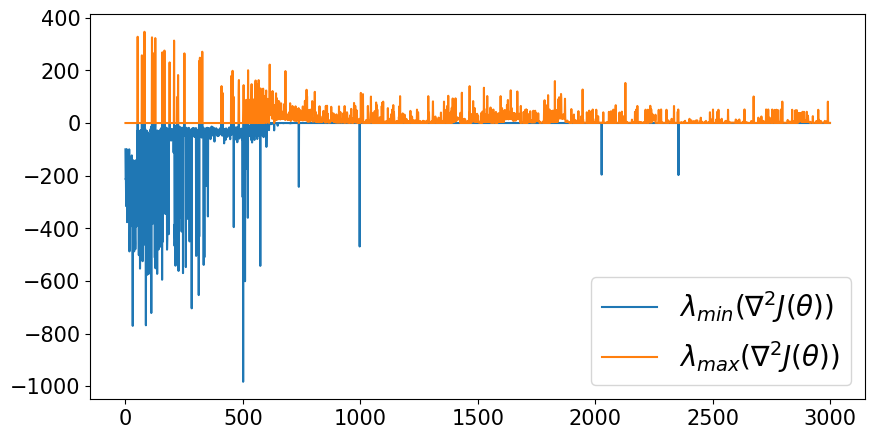

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(np.min(stats["Hessians"], axis=1), label=r"$\lambda_{min} (\nabla^2 J(\theta))$")
plt.plot(np.max(stats["Hessians"], axis=1), label=r"$\lambda_{max} (\nabla^2 J(\theta))$")
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(loc="best", fontsize=20)
plt.show()